<h1> Dog Breed Image Classification </h1>

<h3>Project Goal:</h3>

In this project, I will be developing a model that can identify the breed of a dog from an image. The model will be quite simple and it will involve nine popular breeds:
1. Bernese Mountain Dog
2. Border Collie
3. Chihuahua
4. Corgi
5. Dachshund
6. Golden Retriever
7. Jack Russell Terrier
8. Pug
9. Siberian Husky



<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Libraries  </h1>

In [105]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Loading/Viewing Data </h1>

<p> I am going to load the data for the different breeds and store it in separate lists. While I do this, enjoy some adorable previews of each breed!</p>

In [ ]:
bernese_mountain_dog=[]
for file in os.listdir('../location'):
    im = Image.open('../location' + file)
    bernese_mountain_dog.append(im)
    
display(random.choice(bernese_mountain_dog))

<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Preparing Images </h1>

In [91]:
for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.ANTIALIAS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


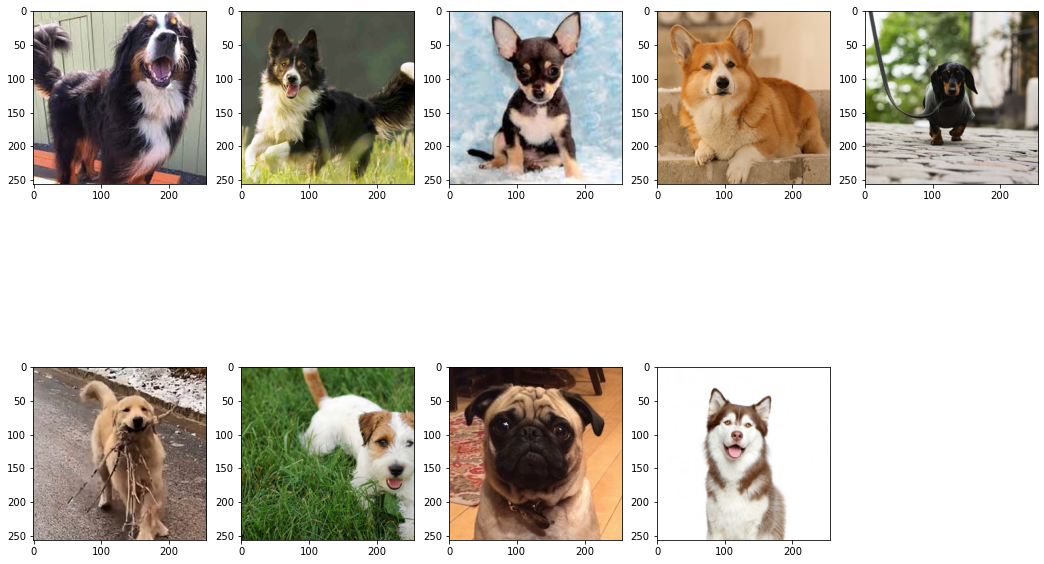

In [92]:
images = []
for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    images.append(random.choice(i))

height = max(8, int(len(images)/5) * 8)
plt.figure(figsize=(18, 12))

for i, image in enumerate(images):
    plt.subplot(len(images) / 5 + 1, 5, i + 1)
    plt.imshow(image)

In [93]:
x = []
y = []

for i in [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]:
    for j in range(len(i)):
        ar = np.asarray(i[j])
        x.append(ar)
x = np.array(x)

        
for i in range(9):
    lists = [bernese_mountain_dog, border_collie, chihuahua, corgi, dachshund, golden_retriever, jack_russell, pug, siberian_husky]
    names = ['bernese_mountain_dog', 'border_collie', 'chihuahua', 'corgi', 'dachshund', 'golden_retriever', 'jack_russell', 'pug', 'siberian_husky']
    for j in range(len(lists[i])):
        y.append(names[i])
        
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [102]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Creating the CNN (Convolutional Neural Network) </h1>

The model shown below has been changed many times to ensure that it gives optimal results. Adjustments included:

* the number of convolutional and fully-connected layers
* the number of neurons in each layer
* dropout
* learning rate

Please note that there are no set rules for determining the optimal number of layers or neurons, and it can only be improved by trial and error. What works best for this dataset is unlikely to work best for another dataset.

In [103]:
model = Sequential()
model.add(Conv2D(28, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(112, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(448, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(896, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Training the Model </h1>

<p> Before training the model, a final step that can help to improve the results is <i> Image Data Augmentation</i>. This method creates new images from the existing images, by making adjustments to them such as shifting in one direction, zooming, flipping or rotating. The model 'sees' these as completely different images, so it can help when the dataset is a bit smaller like it is in this case.</p>

In [118]:
datagen = ImageDataGenerator(
      rescale=1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=1)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=1)

history = model.fit(train, epochs=50, validation_data=test)

Epoch 1/50
742/742 [==============================] - 12s 16ms/step - loss: 0.5497 - accuracy: 0.8073 - val_loss: 1.0483 - val_accuracy: 0.7349
Epoch 2/50
742/742 [==============================] - 12s 16ms/step - loss: 0.4522 - accuracy: 0.8410 - val_loss: 1.3519 - val_accuracy: 0.7470
Epoch 3/50
742/742 [==============================] - 12s 16ms/step - loss: 0.4964 - accuracy: 0.8005 - val_loss: 1.3933 - val_accuracy: 0.7349
Epoch 4/50
742/742 [==============================] - 12s 16ms/step - loss: 0.5945 - accuracy: 0.8167 - val_loss: 1.0707 - val_accuracy: 0.7470
Epoch 5/50
742/742 [==============================] - 12s 16ms/step - loss: 0.4783 - accuracy: 0.8221 - val_loss: 1.2587 - val_accuracy: 0.7229
Epoch 6/50
742/742 [==============================] - 12s 16ms/step - loss: 0.5406 - accuracy: 0.8221 - val_loss: 0.9867 - val_accuracy: 0.6265
Epoch 7/50
742/742 [==============================] - 12s 16ms/step - loss: 0.4301 - accuracy: 0.8504 - val_loss: 1.3159 - val_accuracy:

Before these 50 epochs, the model had already been trained on 150 epochs. As you can see, the accuracy didn't increase much more for the test set in these 50 epochs, so it had pretty much reached its peak before this!

A greater accuracy/smaller loss would have been ideal but as the dataset is quite small, I wasn't expecting it to be perfect.

Now I'm going to feed in some images that were not included in the dataset of dogs that I personally know, to see if the model can predict their breeds correctly.

<h1 style="text-align: left; font-family: 'Garamond'; font-size:30px"> Testing Model on Pets </h1>

The function below takes the file name and the name of the dog as input and returns the breed prediction.

In [120]:
def process_and_predict(file, name):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((256,256), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((256,256), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((256,256), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 256, 256, 3)
    
    maxnum = np.argmax(model.predict(ar))
    if maxnum == 0:
        prediction = 'Bernese Mountain Dog'
    if maxnum == 1:
        prediction = 'Border Collie'
    if maxnum == 2:
        prediction = 'Chihuahua'
    if maxnum == 3:
        prediction = 'Corgi'
    if maxnum == 4:
        prediction = 'Dachshund'
    if maxnum == 5:
        prediction = 'Golden Retriever'
    if maxnum == 6:
        prediction = 'Jack Russell Terrier'
    if maxnum == 7:
        prediction = 'Pug'
    if maxnum == 8:
        prediction = 'Siberian Husky'
        
    print(name + ' is a ' + prediction)
    return im

<h3>Testing</h3>

Domino is a Border Collie


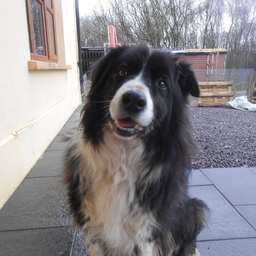

In [121]:
process_and_predict('../input/dominoandtiny/domino.jpg', 'Domino')